In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tglc
from tglc.quick_lc import tglc_lc
tglc.__version__

'0.5.8'

In [3]:
target = '32.087042, 10.994953'     # Target ID ('TOI 519') or coordinates ('ra dec')
local_directory = f'{target}/NGC 821 TGLC'    # directory to save all files
os.makedirs(local_directory, exist_ok=True)
tglc_lc(target=target, 
        local_directory=local_directory, 
        size=10, # FFI cutsize. Recommand at least 50 or larger for better performance. Cannot exceed 99. 
                 # Downloading FFI might take longer (or even cause timeouterror) for larger sizes. 
        save_aper=False, # whether to save 5*5 pixels timeseries of the decontaminated images in fits file primary HDU
        limit_mag=15, # the TESS magnitude lower limit of stars to output
        get_all_lc=False, # whether to return all lcs in the region. If False, return the nearest star to the target coordinate
        first_sector_only=True, # whether to return only lcs from the sector this target was first observed. 
                                # If False, return all sectors of the target, but too many sectors could be slow to download.
        sector=None, # If first_sector_only=True, sector will be ignored.
                     # If first_sector_only=False and sector = None, return all observed sectors
                     # If first_sector_only=False and sector = 1, return only sector 1. 
                     # (Make sure only put observed sectors. All available sectors are printed in the sector table.)
        prior=None)  # If None, does not allow all field stars to float. SUGGESTED for first use. 
                     # If float (usually <1), allow field stars to float with a Gaussian prior with the mean 
                     # at the Gaia predicted value the width of the prior value multiplied on the Gaia predicted value. 

C:\Users\Gumbledalf\Miniconda3\Lib\site-packages\tglc\ffi_cut.py:41: UserWarning: FFI cut size too small, try at least 25*25
  warnings.warn('FFI cut size too small, try at least 25*25')


Target Gaia: Gaia DR2 2571198703079675136
INFO: Query finished. [astroquery.utils.tap.core]
Found 37 Gaia DR3 objects.
Found 6 TIC objects.
INFO: Query finished. [astroquery.utils.tap.core]
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0042-3-3     42      3   3
tess-s0043-2-4     43      2   4


Fitting ePSF:   0%|                                                                           | 0/3534 [00:00<?, ?it/s]

Since the provided target is not TIC ID, the resulted light curve with get_all_lc=False can not be guaranteed to be the target's light curve. Please check the TIC ID of the output file before using the light curve or try use TIC ID as the target in the format of 'TIC 12345678'.
Already in sector 42.


Fitting ePSF: 100%|████████████████████████████████████████████████████████████████| 3534/3534 [00:58<00:00, 60.74it/s]
C:\Users\Gumbledalf\Miniconda3\Lib\site-packages\tglc\target_lightcurve.py:244: UserWarning: TESS FFI cut includes Nan values. Please shift the center of the cutout to remove Nan near edge. Target: 32.087042, 10.994953
  warnings.warn(
Fitting lc:   0%|                                                                                | 0/1 [00:00<?, ?it/s]

Target not found in the requested sector (Sector 42). This can be caused by a lack of Gaia ID or an incomplete TESS to Gaia crossmatch table. Please check whether the output light curve Gaia DR3 ID agrees with your target.


Fitting lc: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.12s/it]


In [ ]:
# download from MAST (not necessary)
from astroquery.mast import Observations

obs_table = Observations.query_criteria(objectname='TIC 389023759',
                                        radius='.001 deg',
                                        provenance_name='TGLC')
data_products = Observations.get_product_list(obs_table)
print(obs_table) 

product = data_products[0]["dataURI"] # download the first light curve if multiple lcs are returned
result = Observations.download_file(product) # check obs_table['target_name'], which is the TIC ID

sector = 42


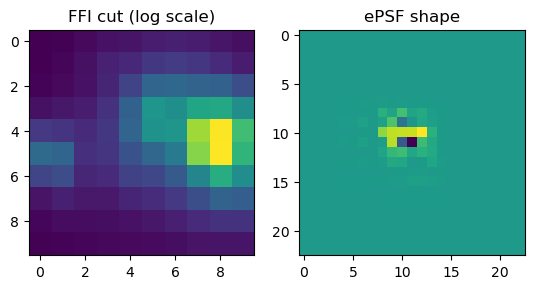

In [5]:
import pickle
with open(f'{local_directory}source/source_32.087042, 10.994953_earliest_sector.pkl', 'rb') as input_:
    source = pickle.load(input_)
    print(f'sector = {source.sector}')
epsf = np.load(f'{local_directory}epsf/epsf_32.087042, 10.994953_sector_42.npy')

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.log10(source.flux[0]))
ax1.set_title('FFI cut (log scale)')
ax2.imshow(epsf[0,:23**2].reshape(23,23))
ax2.set_title('ePSF shape')
plt.show()
# print(source.gaia[:5]) # all the gaia stars 
# print(source.tic[:5]) # TIC ID to Gaia DR2 conversion

In [6]:
target = '32.087042, 10.994953'     # Target ID ('TOI 519') or coordinates ('ra dec')
local_directory = f'{target}/NGC 821 TGLC 40px'    # directory to save all files
os.makedirs(local_directory, exist_ok=True)
tglc_lc(target=target, 
        local_directory=local_directory, 
        size=40,
        save_aper=False, # whether to save 5*5 pixels timeseries of the decontaminated images in fits file primary HDU
        limit_mag=15, # the TESS magnitude lower limit of stars to output
        get_all_lc=False, # whether to return all lcs in the region. If False, return the nearest star to the target coordinate
        first_sector_only=True, 
        sector=None, 
        prior=None)  

Target Gaia: Gaia DR2 2571198703079675136
INFO: Query finished. [astroquery.utils.tap.core]
Found 353 Gaia DR3 objects.
Found 39 TIC objects.
INFO: Query finished. [astroquery.utils.tap.core]
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0042-3-3     42      3   3
tess-s0043-2-4     43      2   4


Fitting ePSF:   0%|                                                                           | 0/3534 [00:00<?, ?it/s]

Since the provided target is not TIC ID, the resulted light curve with get_all_lc=False can not be guaranteed to be the target's light curve. Please check the TIC ID of the output file before using the light curve or try use TIC ID as the target in the format of 'TIC 12345678'.
Already in sector 42.


Fitting ePSF: 100%|████████████████████████████████████████████████████████████████| 3534/3534 [02:21<00:00, 24.92it/s]
C:\Users\Gumbledalf\Miniconda3\Lib\site-packages\tglc\target_lightcurve.py:244: UserWarning: TESS FFI cut includes Nan values. Please shift the center of the cutout to remove Nan near edge. Target: 32.087042, 10.994953
  warnings.warn(
Fitting lc:   0%|                                                                                | 0/1 [00:00<?, ?it/s]

Target not found in the requested sector (Sector 42). This can be caused by a lack of Gaia ID or an incomplete TESS to Gaia crossmatch table. Please check whether the output light curve Gaia DR3 ID agrees with your target.


Fitting lc: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]


sector = 42


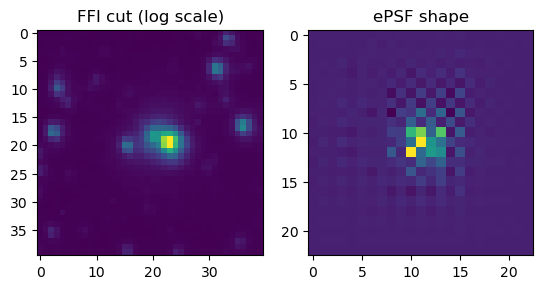

In [8]:
with open(f'{local_directory}source/source_32.087042, 10.994953_earliest_sector.pkl', 'rb') as input_:
    source = pickle.load(input_)
    print(f'sector = {source.sector}')
epsf = np.load(f'{local_directory}epsf/epsf_32.087042, 10.994953_sector_42.npy')

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.log10(source.flux[0]))
ax1.set_title('FFI cut (log scale)')
ax2.imshow(epsf[0,:23**2].reshape(23,23))
ax2.set_title('ePSF shape')
plt.savefig("NGC 821 TGLC 40px TPF")
#ax2.savefig("NGC 821 TGLC 40px ePSF")
plt.show()